In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor)

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                            mean_absolute_percentage_error, explained_variance_score,
                            max_error)


from scipy import stats
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



In [2]:
df = pd.read_csv('flood.csv')
df

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanization  ClimateChange  DamsQuality  Siltation  \
0                 4              4            6          2   
1                 7              9            1          5   
2                 7              5            4          7   
3                 3              4            1          4   
4                 5              8            5          2   
...             ...            ...          ...        ...   
49995             5              9            4          6   
49996             3              3            4          4   
49997             2              1            4          5   
49998             6              3           10          2   
49999             5              6            5          4   

       AgriculturalPractices  Encroachments  ...  DrainageSystems  \
0                          3              2  ...               10   
1                          5              4  ...                9   
2                          4              9  ...                7   
3                          6              4  ...                4   
4                          7              5  ...                7   
...                      ...            ...  ...              ...   
49995                     10              4  ...                7   
49996                      3             11  ...                8   
49997                      6              7  ...                4   
49998                      6             11  ...                6   
49999                      9             10  ...                2   

       CoastalVulnerability  Landslides  Watersheds  \
0                         7           4           2   
1                         2           6           2   
2                         4           4           8   
3                         2           6           6   
4                         6           5           3   
...                     ...         ...         ...   
49995                     3           8           8   
49996                     6           3           6   
49997                     6           4           1   
49998                     3           4           7   
49999                     4           4           5   

       DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                                3                4            3   
1                                1                1            9   
2                                6                1            8   
3                                8                8            6   
4                                3                4            4   
...                            ...              ...          ...   
49995                            6                1            5   
49996                            4                4            2   
49997                            5                1            6   
49998                            6                2            4   
49999                            6                7            8   

      

In [3]:
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [4]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
df.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.000000      0.00000      0.000000   
25%        3.000000       3.000000      3.00000      3.000000   
50%        5.000000       5.000000      5.00000      5.000000   
75%        6.000000       6.000000      6.00000      6.000000   
max       17.000000      17.000000     16.00000     16.000000   

       AgriculturalPractices  Encroachments  ...  DrainageSystems  \
count           50000.000000   50000.000000  ...     50000.000000   
mean                5.006120       5.006380  ...         5.006060   
std                 2.234588       2.241633  ...         2.238107   
min                 0.000000       0.000000  ...         0.000000   
25%                 3.000000       3.000000  ...         3.000000   
50%                 5.000000       5.000000  ...         5.000000   
75%                 6.000000       6.000000  ...         6.000000   
max                16.000000      18.000000  ...        17.000000   

       CoastalVulnerability    Landslides   Watersheds  \
count          50000.000000  50000.000000  50000.00000   
mean               4.999920      4.984220      4.97982   
std                2.247101      2.227741      2.23219   
min                0.000000      0.000000      0.00000   
25%                3.000000      3.000000      3.00000   
50%                5.000000      5.000000      5.00000   
75%                6.000000      6.000000      6.00000   
max               17.000000     16.000000     16.00000   

       DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
count                 50000.000000     50000.000000  50000.00000   
mean                      4.988200         4.984980      5.00512   
std                       2.231134         2.238279      2.23176   
min                       0.000000         0.000000      0.00000   
25%                       3.000000         3.000000      3.00000   
50%                       5.000000         5.000000      5.00000   
75%                       6.000000         6.000000      6.00000   
max                      17.000000        19.000000     22.00000   

       InadequatePlanning  PoliticalFactors  FloodProbability  
count        50000.000000      50000.000000      50000.000000  
mean             4.994360          4.990520          0.499660  
std              2.230011          2.246075          0.050034  
min              0.000000          0.000000          0.285000  
25%              3.000000          3.000000          0.465000  
50%              5.000000          5.000000          0.500000  
75%              6.000000          6.000000          0.535000  
max             16.000000         16.000000          0.725000  

[8 rows x 21 columns]

In [6]:
# Target Column
target_col = "FloodProbability"
df[target_col].mean()

0.4996604

In [7]:
df[target_col].max()

0.725

In [8]:
df[target_col].min()

0.285

In [9]:
df[target_col].std()

0.050034395575991396

# Correlation with Flood Probability

DeterioratingInfrastructure    0.229444
TopographyDrainage             0.229414
RiverManagement                0.228917
Watersheds                     0.228152
DamsQuality                    0.227467
Name: FloodProbability, dtype: float64


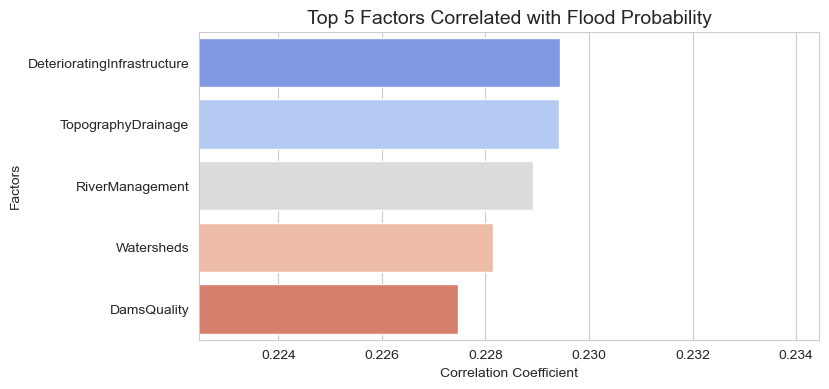

In [10]:
# Top 5 Factors Most Correlated with Flood Probability
correlations = (
    df.corr(numeric_only=True)["FloodProbability"]
    .drop("FloodProbability")
    .sort_values(ascending=False)
)

top5_factors = correlations.head(5)

print(top5_factors)

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(
    x=top5_factors.values,
    y=top5_factors.index,
    palette="coolwarm"
)
plt.title("Top 5 Factors Correlated with Flood Probability", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.xlim(top5_factors.min() - 0.005, top5_factors.max() + 0.005)
plt.ylabel("Factors")
plt.show()

# Correlation Analysis

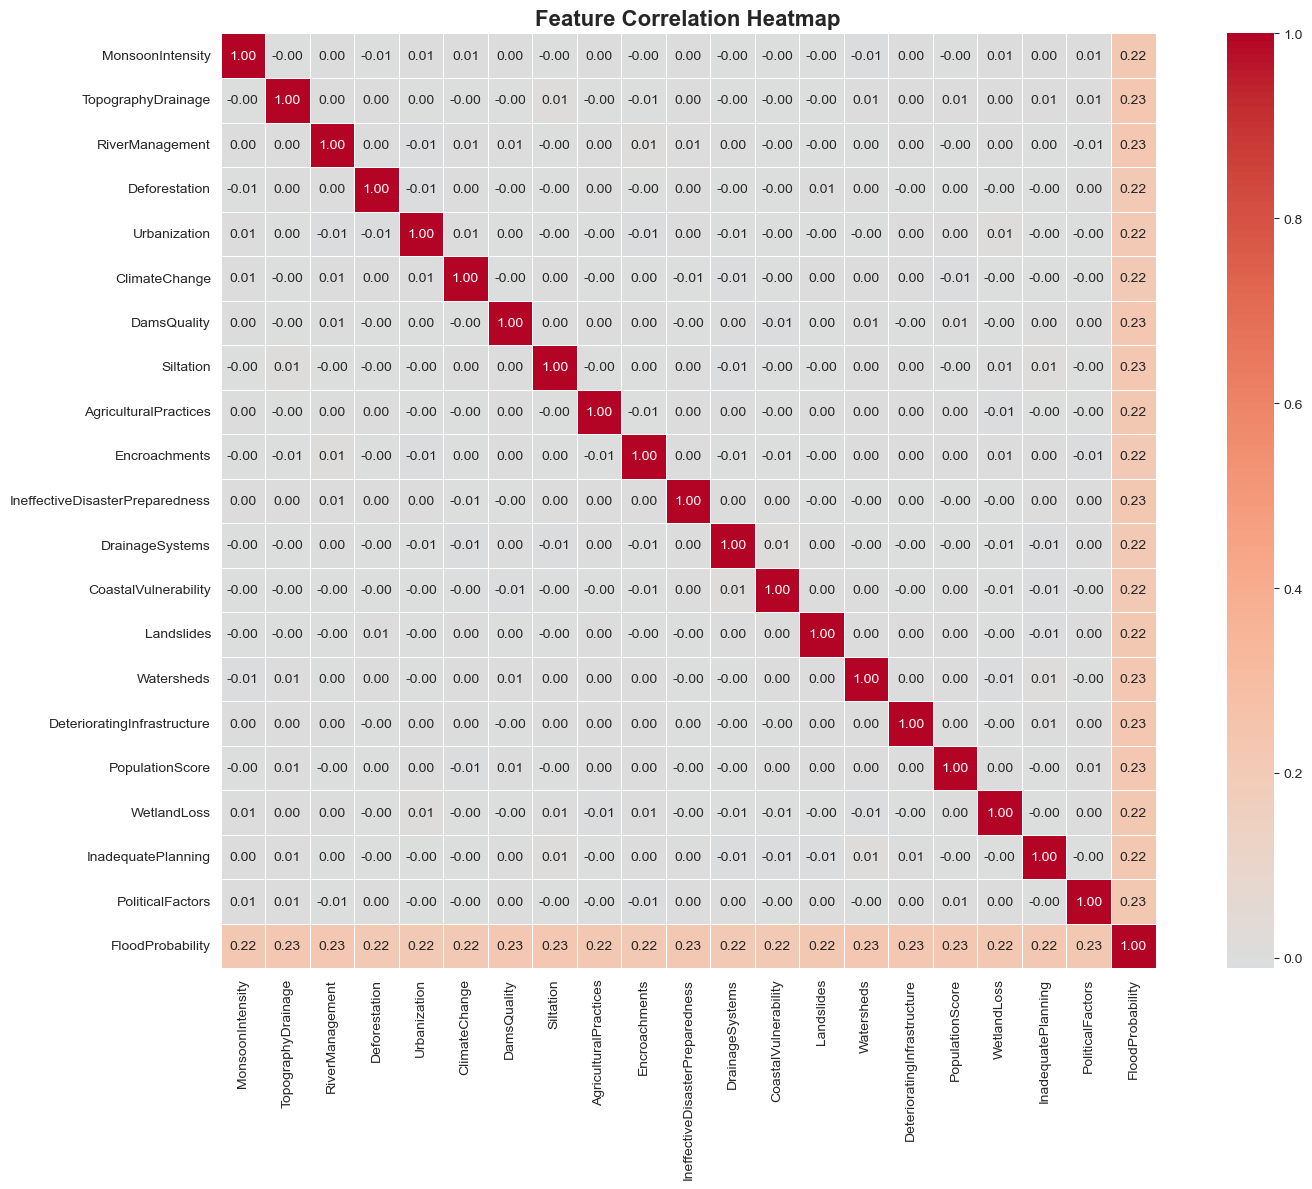

In [11]:
plt.figure(figsize=(16, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True,fmt ='.2f', cmap="coolwarm",
            center = 0 ,square=True, linewidths=0.5)

plt.title('Feature Correlation Heatmap', fontsize=16 , fontweight= 'bold')
plt.tight_layout()
plt.show()



# Train Test Split

In [12]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Metrics Calculated of All regression

In [13]:
def calculate_all_metrics(y_true, y_pred, model_name):

  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  try:
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
  except:
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-10))) * 100

  max_err = max_error(y_true, y_pred)

  # Adjust R2
  n = len(y_true)
  k = X_train.shape[1]
  adj_r2 = 1 - (1-r2) *(n-1)/(n-k-1) if (n-k-1)> 0 else r2

  # Mean Bias Error
  mbe = np.mean(y_pred - y_true)


  return {
      'Model': model_name,
      'R2': r2,
      'Adjusted R²': adj_r2,
      'RMSE': rmse,
      'MAE': mae,
      'MAPE (%)': mape,
      'Max Error': max_err,
      'Mean Bias Error': mbe,
  }

print(" Metrics function defined ")


 Metrics function defined 


# All Models

In [14]:
all_results = []
all_predictions = {}
trained_models = {}
best_params_dict = {}

# Decision Tree Model

In [15]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth = 10, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

metrics_dt = calculate_all_metrics(y_test, dt_pred, "Decision Tree")
all_results.append(metrics_dt)
all_predictions['Decision Tree'] = dt_pred
trained_models['Decision Tree'] = dt_model

print(f"R2: {metrics_dt['R2']:.4f} ")
print(f"RMSE: {metrics_dt['RMSE']:.4f}")
print(f"MAE: {metrics_dt['MAE']:.4f}")
print(f"MAPE: {metrics_dt['MAPE (%)']:.4f}%")

R2: 0.2249 
RMSE: 0.0439
MAE: 0.0350
MAPE: 7.0829%


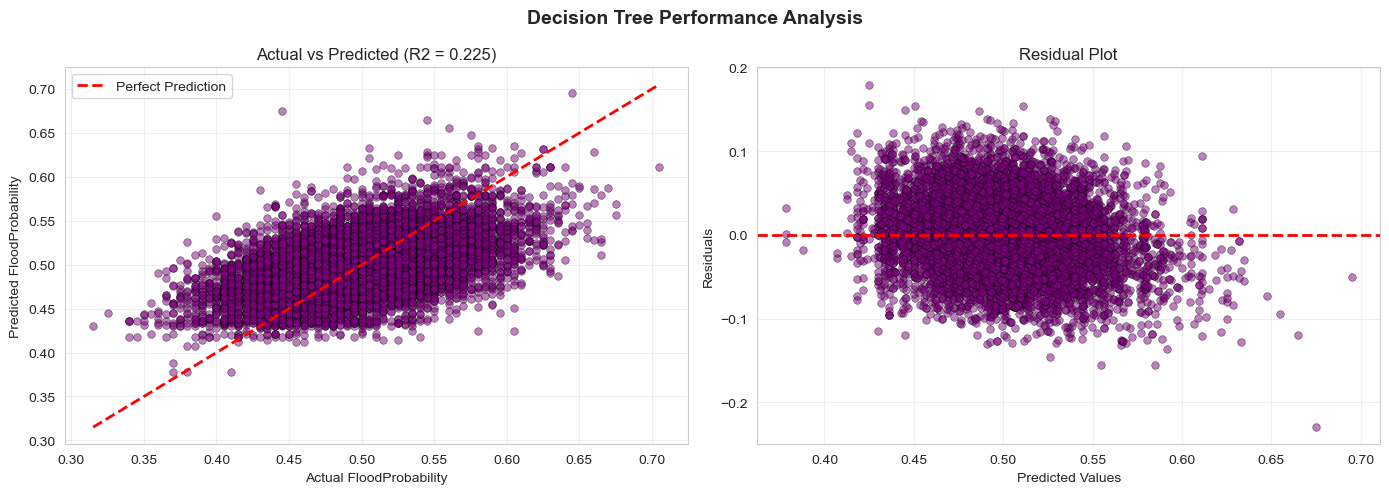

In [16]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
fig.suptitle('Decision Tree Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, dt_pred, alpha=0.5, s=30, edgecolor = 'black', linewidth=0.5, color='purple')
axes[0].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],
             'r--', linewidth=2 , label = 'Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_dt["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_dt = y_test.values - dt_pred
axes[1].scatter(dt_pred, residuals_dt, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='purple')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Extra Trees Model

In [17]:
et_model = ExtraTreesRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs = -1)
et_model.fit(X_train,y_train)
et_pred = et_model.predict(X_test)

metrics_et = calculate_all_metrics(y_test, et_pred,'Extra Trees')
all_results.append(metrics_et)
all_predictions['Extra Trees'] = et_pred
trained_models['Extra_Trees'] = et_model

print(f"R2: {metrics_et['R2']:.4f} ")
print(f"RMSE: {metrics_et['RMSE']:.4f}")
print(f"MAE: {metrics_et['MAE']:.4f}")
print(f"MAPE: {metrics_et['MAPE (%)']:.4f}%")

R2: 0.6899 
RMSE: 0.0278
MAE: 0.0221
MAPE: 4.4708%


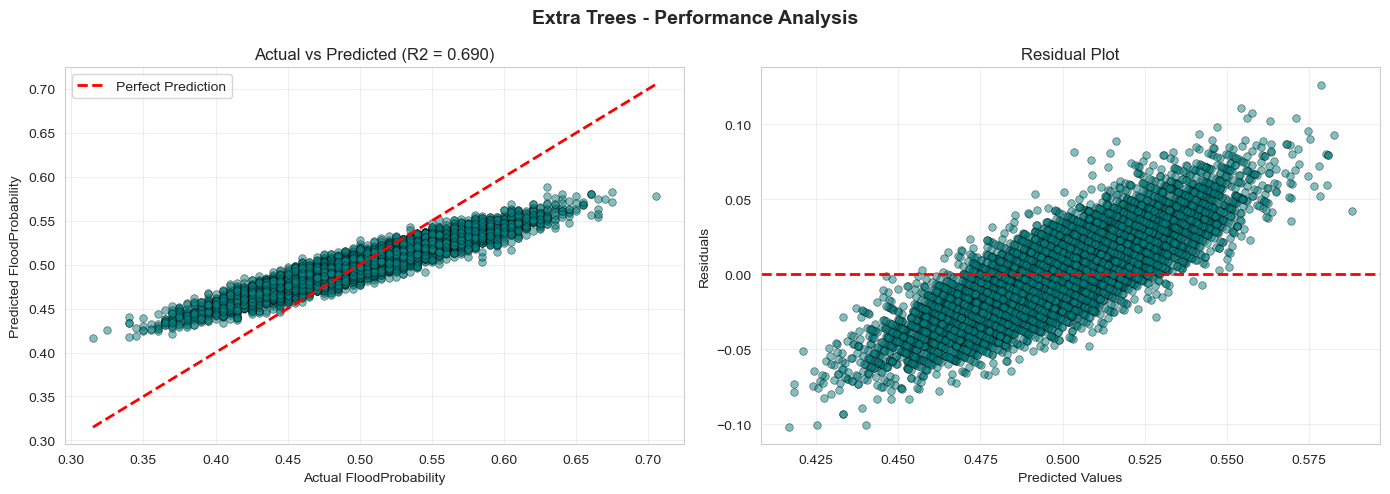

In [18]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Extra Trees - Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, et_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='teal')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_et["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_et = y_test.values - et_pred
axes[1].scatter(et_pred, residuals_et, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='teal')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Random Forest Model


In [19]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate metrics
metrics_rf = calculate_all_metrics(y_test, rf_pred, 'Random Forest')
all_results.append(metrics_rf)
all_predictions['Random Forest'] = rf_pred
trained_models['Random Forest'] = rf_model

# Display metrics
print(f"   R2:   {metrics_rf['R2']:.4f}")
print(f"   RMSE: {metrics_rf['RMSE']:.4f}")
print(f"   MAE:  {metrics_rf['MAE']:.4f}")
print(f"   MAPE: {metrics_rf['MAPE (%)']:.2f}%")





   R2:   0.7083
   RMSE: 0.0270
   MAE:  0.0213
   MAPE: 4.30%


In [20]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance_rf.head(5).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")


   2. TopographyDrainage: 0.0535
   7. DamsQuality: 0.0532
   20. PoliticalFactors: 0.0530
   11. IneffectiveDisasterPreparedness: 0.0520
   17. PopulationScore: 0.0519


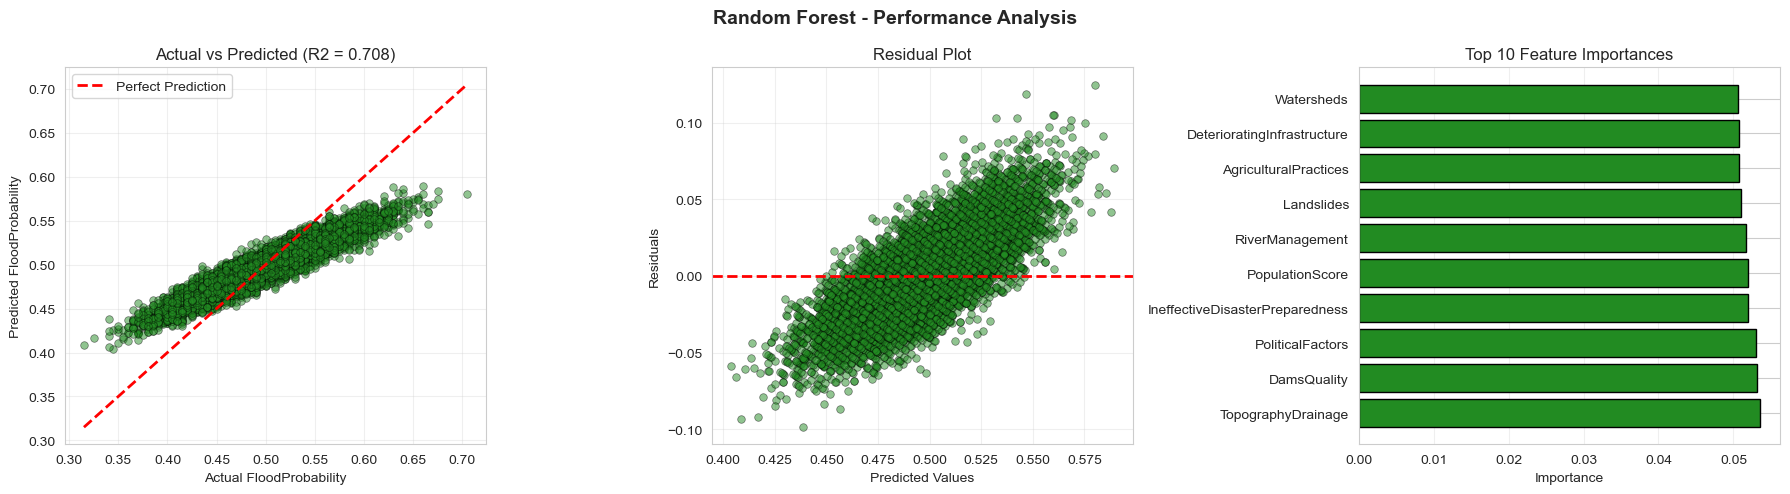

In [21]:
# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Random Forest - Performance Analysis', fontsize=14, fontweight='bold')

# Actual vs Predicted
axes[0].scatter(y_test, rf_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='forestgreen')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_rf["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residual plot
residuals_rf = y_test.values - rf_pred
axes[1].scatter(rf_pred, residuals_rf, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='forestgreen')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

# Feature importance
top_10_features = feature_importance_rf.head(10)
axes[2].barh(top_10_features['Feature'], top_10_features['Importance'], color='forestgreen', edgecolor='black')
axes[2].set_xlabel('Importance')
axes[2].set_title('Top 10 Feature Importances')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


# Gradient Boosting Model

In [22]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Calculate metrics
metrics_gb = calculate_all_metrics(y_test, gb_pred, 'Gradient Boosting')
all_results.append(metrics_gb)
all_predictions['Gradient Boosting'] = gb_pred
trained_models['Gradient Boosting'] = gb_model

# Display metrics
print(f"   R2:   {metrics_gb['R2']:.4f}")
print(f"   RMSE: {metrics_gb['RMSE']:.4f}")
print(f"   MAE:  {metrics_gb['MAE']:.4f}")
print(f"   MAPE: {metrics_gb['MAPE (%)']:.2f}%")


   R2:   0.8826
   RMSE: 0.0171
   MAE:  0.0134
   MAPE: 2.71%


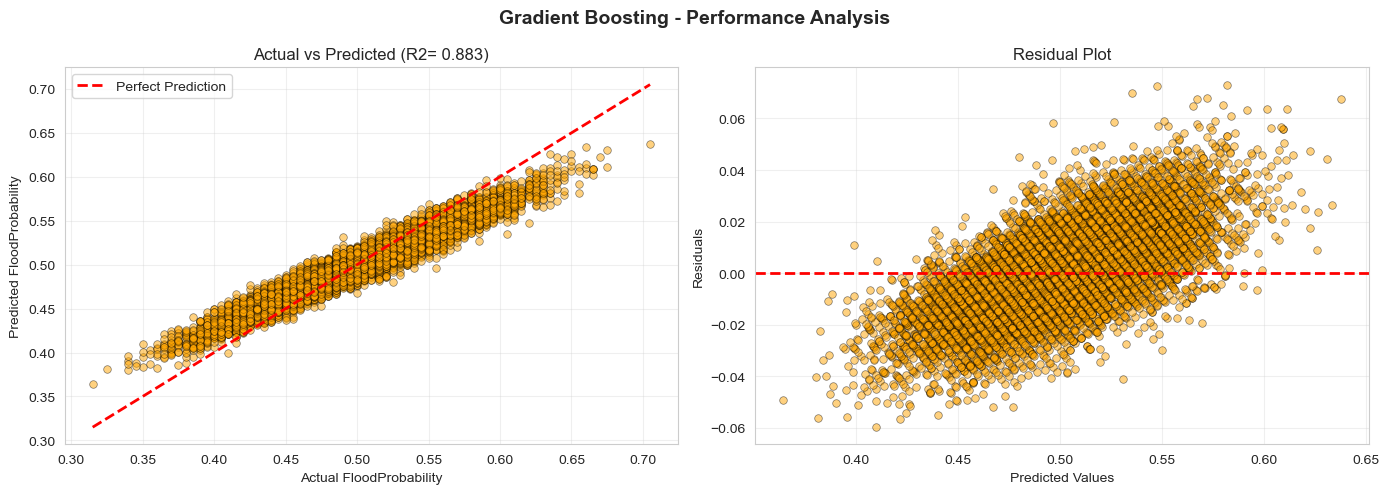

In [23]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Gradient Boosting - Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, gb_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='orange')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2= {metrics_gb["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_gb = y_test.values - gb_pred
axes[1].scatter(gb_pred, residuals_gb, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# AdaBoost Model

In [24]:
# AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

# Calculate metrics
metrics_ada = calculate_all_metrics(y_test, ada_pred, 'AdaBoost')
all_results.append(metrics_ada)
all_predictions['AdaBoost'] = ada_pred
trained_models['AdaBoost'] = ada_model

# Display metrics

print(f"   R2:   {metrics_ada['R2']:.4f}")
print(f"   RMSE: {metrics_ada['RMSE']:.4f}")
print(f"   MAE:  {metrics_ada['MAE']:.4f}")
print(f"   MAPE: {metrics_ada['MAPE (%)']:.2f}%")

   R2:   0.3372
   RMSE: 0.0406
   MAE:  0.0323
   MAPE: 6.59%


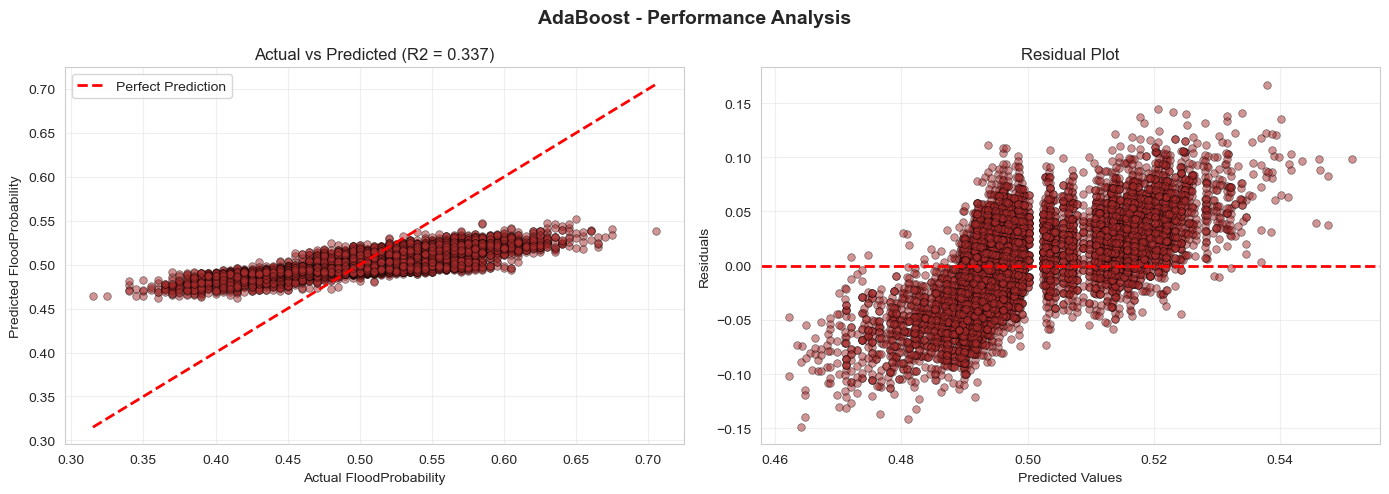

In [25]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('AdaBoost - Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, ada_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='brown')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_ada["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_ada = y_test.values - ada_pred
axes[1].scatter(ada_pred, residuals_ada, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='brown')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# XGBoost Model

In [26]:
# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Calculate metrics
metrics_xgb = calculate_all_metrics(y_test, xgb_pred, 'XGBoost')
all_results.append(metrics_xgb)
all_predictions['XGBoost'] = xgb_pred
trained_models['XGBoost'] = xgb_model

# Display metrics
print(f"   R2:   {metrics_xgb['R2']:.4f}")
print(f"   RMSE: {metrics_xgb['RMSE']:.4f}")
print(f"   MAE:  {metrics_xgb['MAE']:.4f}")
print(f"   MAPE: {metrics_xgb['MAPE (%)']:.2f}%")



   R2:   0.9049
   RMSE: 0.0154
   MAE:  0.0121
   MAPE: 2.44%


In [27]:
# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)


for idx, row in feature_importance_xgb.head(5).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")


   17. PopulationScore: 0.0564
   7. DamsQuality: 0.0544
   9. AgriculturalPractices: 0.0543
   20. PoliticalFactors: 0.0532
   3. RiverManagement: 0.0532


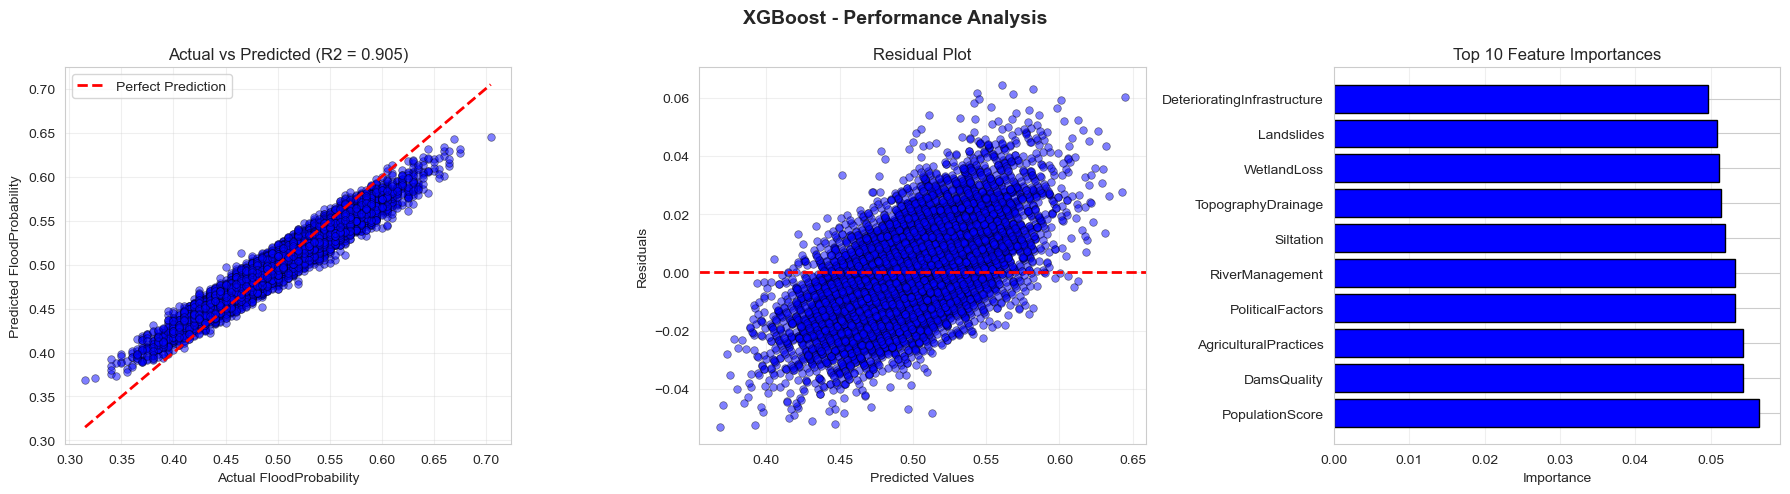

In [28]:
# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('XGBoost - Performance Analysis', fontsize=14, fontweight='bold')

# Actual vs Predicted
axes[0].scatter(y_test, xgb_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_xgb["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residual plot
residuals_xgb = y_test.values - xgb_pred
axes[1].scatter(xgb_pred, residuals_xgb, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='blue')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

# Feature importance
top_10_features_xgb = feature_importance_xgb.head(10)
axes[2].barh(top_10_features_xgb['Feature'], top_10_features_xgb['Importance'], color='blue', edgecolor='black')
axes[2].set_xlabel('Importance')
axes[2].set_title('Top 10 Feature Importances')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


# LightGBM Model

In [29]:
# LightGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# Calculate metrics
metrics_lgbm = calculate_all_metrics(y_test, lgbm_pred, 'LightGBM')
all_results.append(metrics_lgbm)
all_predictions['LightGBM'] = lgbm_pred
trained_models['LightGBM'] = lgbm_model

# Display metrics
print(f"   R2:   {metrics_lgbm['R2']:.4f}")
print(f"   RMSE: {metrics_lgbm['RMSE']:.4f}")
print(f"   MAE:  {metrics_lgbm['MAE']:.4f}")
print(f"   MAPE: {metrics_lgbm['MAPE (%)']:.2f}%")



  File "c:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\abdul\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abdul\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\abdul\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


   R2:   0.9041
   RMSE: 0.0155
   MAE:  0.0121
   MAPE: 2.44%


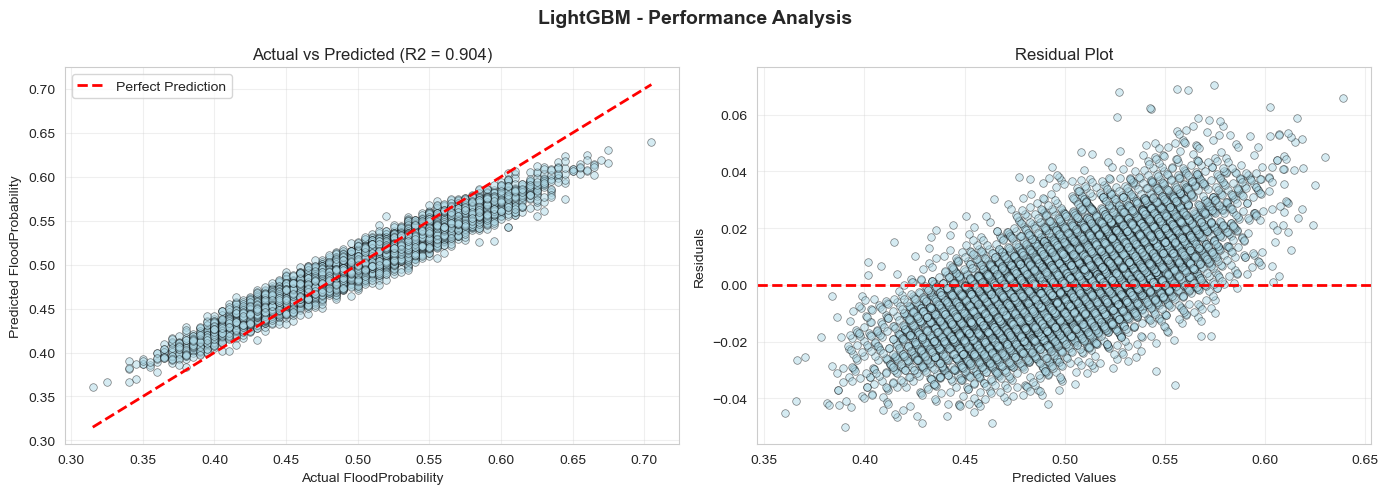

In [30]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('LightGBM - Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, lgbm_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='lightblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_lgbm["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_lgbm = y_test.values - lgbm_pred
axes[1].scatter(lgbm_pred, residuals_lgbm, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='lightblue')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# CatBoost Model


In [31]:
# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

# Calculate metrics
metrics_catboost = calculate_all_metrics(y_test, cat_pred, 'CatBoost')
all_results.append(metrics_catboost)
all_predictions['CatBoost'] = cat_pred
trained_models['CatBoost'] = cat_model  

# Display metrics
print(f"   R2:   {metrics_catboost['R2']:.4f}")
print(f"   RMSE: {metrics_catboost['RMSE']:.4f}")
print(f"   MAE:  {metrics_catboost['MAE']:.4f}")
print(f"   MAPE: {metrics_catboost['MAPE (%)']:.2f}%")

   R2:   0.9297
   RMSE: 0.0132
   MAE:  0.0102
   MAPE: 2.06%


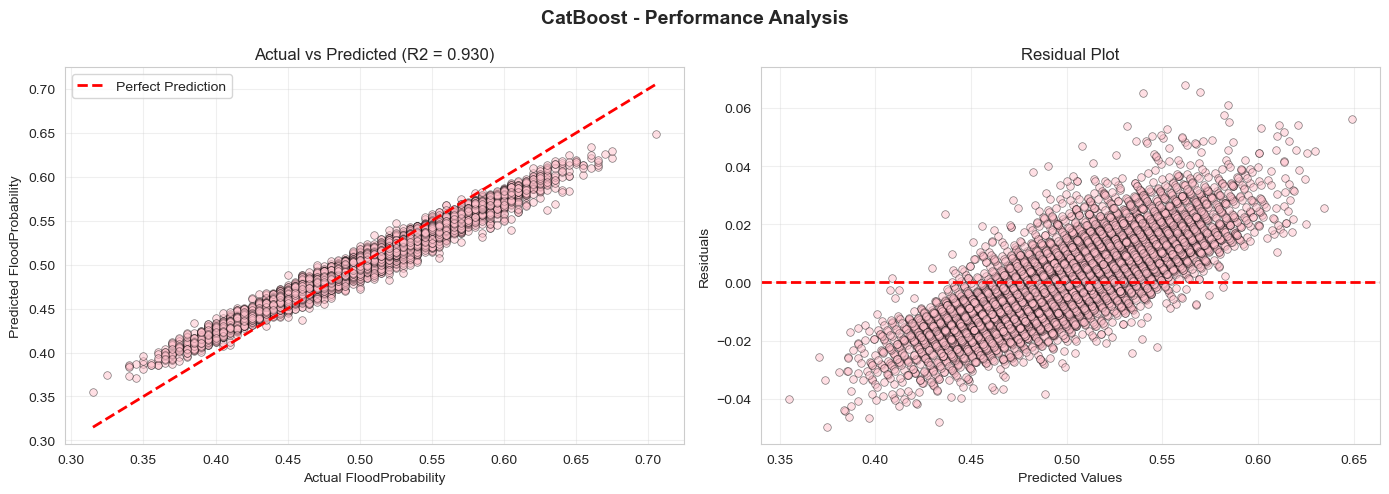

In [32]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('CatBoost - Performance Analysis', fontsize=14, fontweight='bold')

axes[0].scatter(y_test, cat_pred, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='pink')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual FloodProbability')
axes[0].set_ylabel('Predicted FloodProbability')
axes[0].set_title(f'Actual vs Predicted (R2 = {metrics_catboost["R2"]:.3f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_catboost = y_test.values - cat_pred
axes[1].scatter(cat_pred, residuals_catboost, alpha=0.5, s=30, edgecolor='black', linewidth=0.5, color='pink')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# FINAL COMPARISON of  All Models

In [33]:
# Create results dataframe
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('R2', ascending=False).reset_index(drop=True)
print("Complete Performance Table:")
print(results_df[['Model', 'R2', 'Adjusted R²', 'RMSE', 'MAE', 'MAPE (%)']].to_string(index=False))

# Best model
best_model_name = results_df.iloc[0]['Model']
print(f"   R2:   {results_df.iloc[0]['R2']:.4f}")
print(f"   RMSE: {results_df.iloc[0]['RMSE']:.4f}")
print(f"   MAE:  {results_df.iloc[0]['MAE']:.4f}")

Complete Performance Table:
            Model       R2  Adjusted R²     RMSE      MAE  MAPE (%)
         CatBoost 0.929718     0.929577 0.013230 0.010180  2.062720
          XGBoost 0.904934     0.904744 0.015387 0.012071  2.439026
         LightGBM 0.904113     0.903920 0.015454 0.012095  2.438499
Gradient Boosting 0.882595     0.882360 0.017100 0.013389  2.706785
    Random Forest 0.708267     0.707682 0.026955 0.021324  4.303807
      Extra Trees 0.689922     0.689300 0.027790 0.022065  4.470831
         AdaBoost 0.337243     0.335915 0.040628 0.032328  6.588287
    Decision Tree 0.224914     0.223360 0.043937 0.035031  7.082879
   R2:   0.9297
   RMSE: 0.0132
   MAE:  0.0102


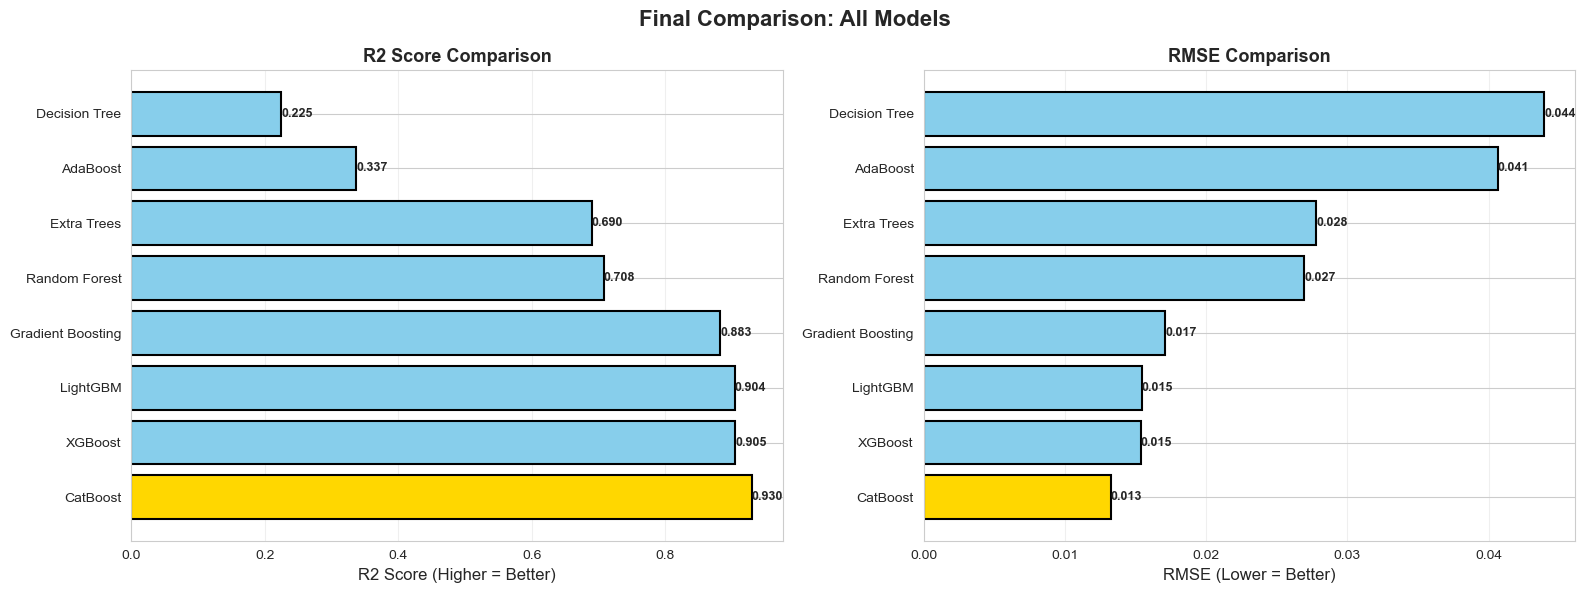

In [34]:
# Visualization : R2 and RMSE Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Final Comparison: All Models', fontsize=16, fontweight='bold')

colors = ['gold' if i == 0 else 'skyblue' for i in range(len(results_df))]

# R2 Score
ax1 = axes[0]
bars1 = ax1.barh(results_df['Model'], results_df['R2'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('R2 Score (Higher = Better)', fontsize=12)
ax1.set_title('R2 Score Comparison', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
            ha='left', va='center', fontweight='bold', fontsize=9)


# RMSE
ax2 = axes[1]
bars2 = ax2.barh(results_df['Model'], results_df['RMSE'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('RMSE (Lower = Better)', fontsize=12)
ax2.set_title('RMSE Comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
            ha='left', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()




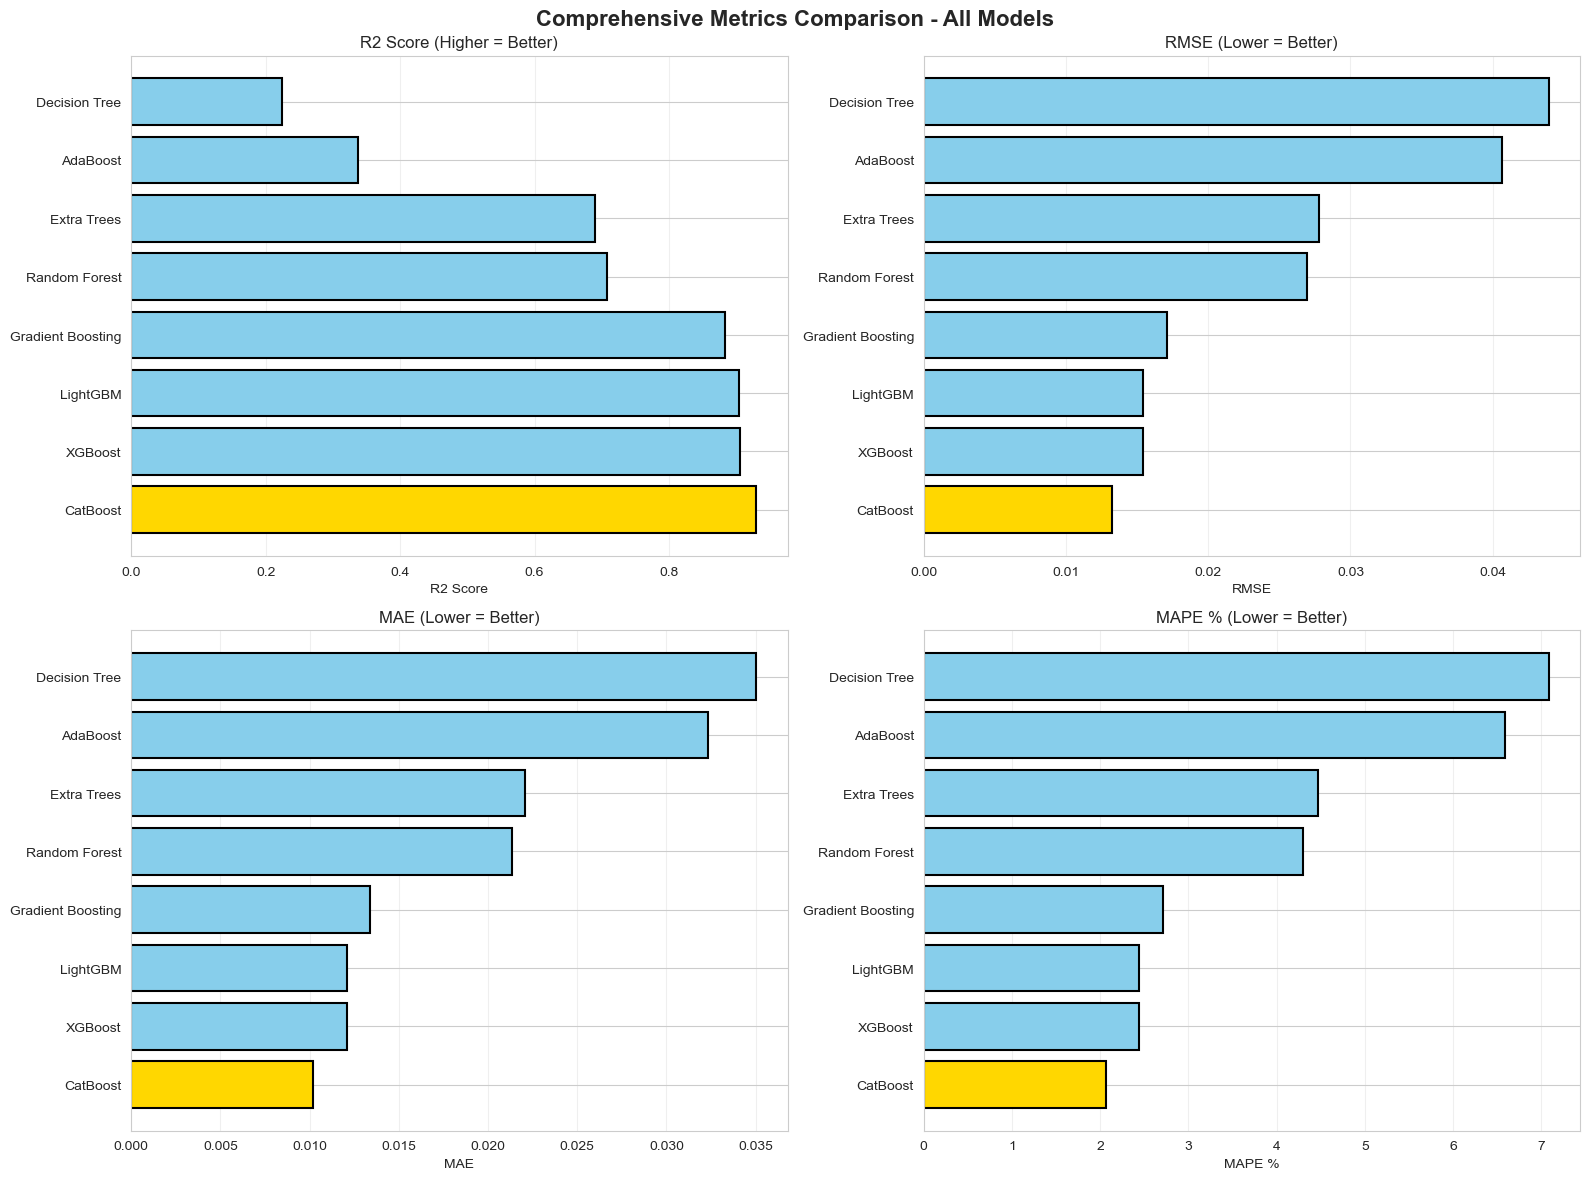

In [35]:
# Visualization : All Metrics Overview 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Metrics Comparison - All Models', fontsize=16, fontweight='bold')

colors = ['gold' if i == 0 else 'skyblue' for i in range(len(results_df))]

# R2
ax1 = axes[0, 0]
ax1.barh(results_df['Model'], results_df['R2'], color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('R2 Score')
ax1.set_title('R2 Score (Higher = Better)')
ax1.grid(axis='x', alpha=0.3)

# RMSE
ax2 = axes[0, 1]
ax2.barh(results_df['Model'], results_df['RMSE'], color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('RMSE')
ax2.set_title('RMSE (Lower = Better)')
ax2.grid(axis='x', alpha=0.3)

# MAE
ax3 = axes[1, 0]
ax3.barh(results_df['Model'], results_df['MAE'], color=colors, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('MAE')
ax3.set_title('MAE (Lower = Better)')
ax3.grid(axis='x', alpha=0.3)

# MAPE
ax4 = axes[1, 1]
ax4.barh(results_df['Model'], results_df['MAPE (%)'], color=colors, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('MAPE %')
ax4.set_title('MAPE % (Lower = Better)')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



TOP 5 MODELS DETAILED COMPARISON


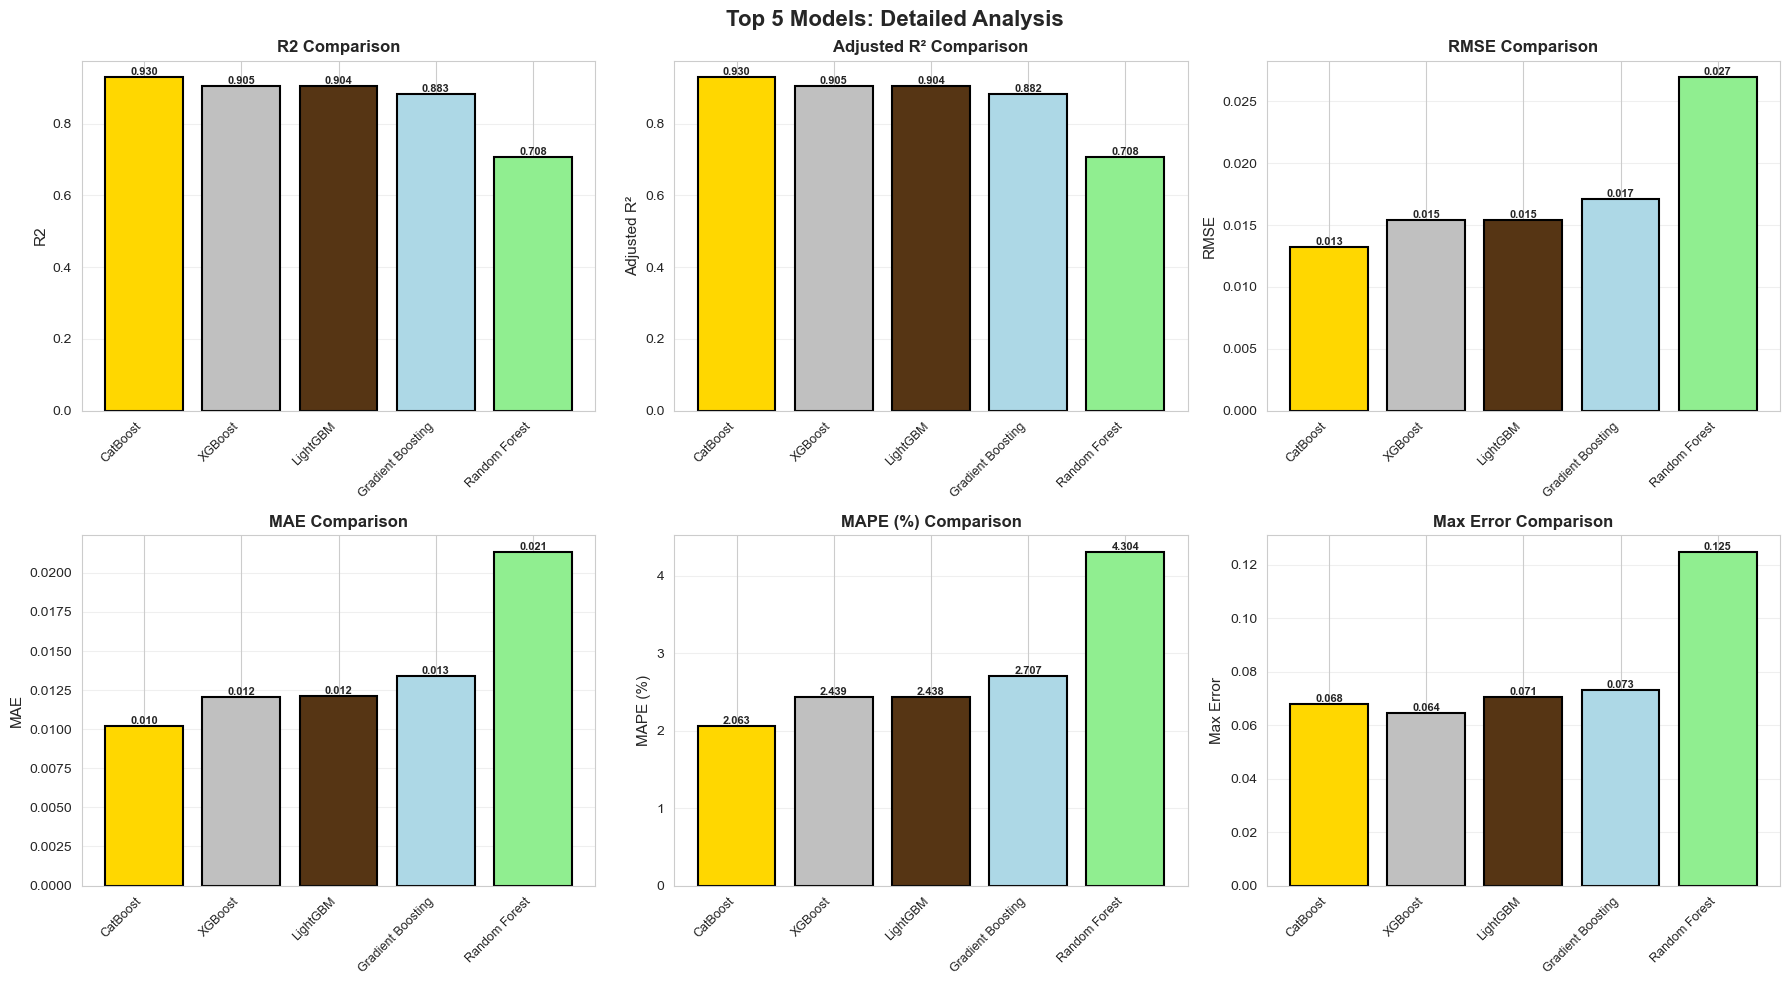

In [36]:
# Visualization : Top 5 Models Comparison
print("TOP 5 MODELS DETAILED COMPARISON")
top_5_models = results_df.head(5)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Top 5 Models: Detailed Analysis', fontsize=16, fontweight='bold')
axes = axes.flatten()

metrics_to_plot = ['R2', 'Adjusted R²', 'RMSE', 'MAE', 'MAPE (%)', 'Max Error']
colors_top5 = ['gold', 'silver', "#563514", 'lightblue', 'lightgreen']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(range(len(top_5_models)), top_5_models[metric],
                  color=colors_top5, edgecolor='black', linewidth=1.5)
    ax.set_xticks(range(len(top_5_models)))
    ax.set_xticklabels(top_5_models['Model'], rotation=45, ha='right', fontsize=9)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()


ALL MODELS :  ACTUAL VS PREDICTED GRID


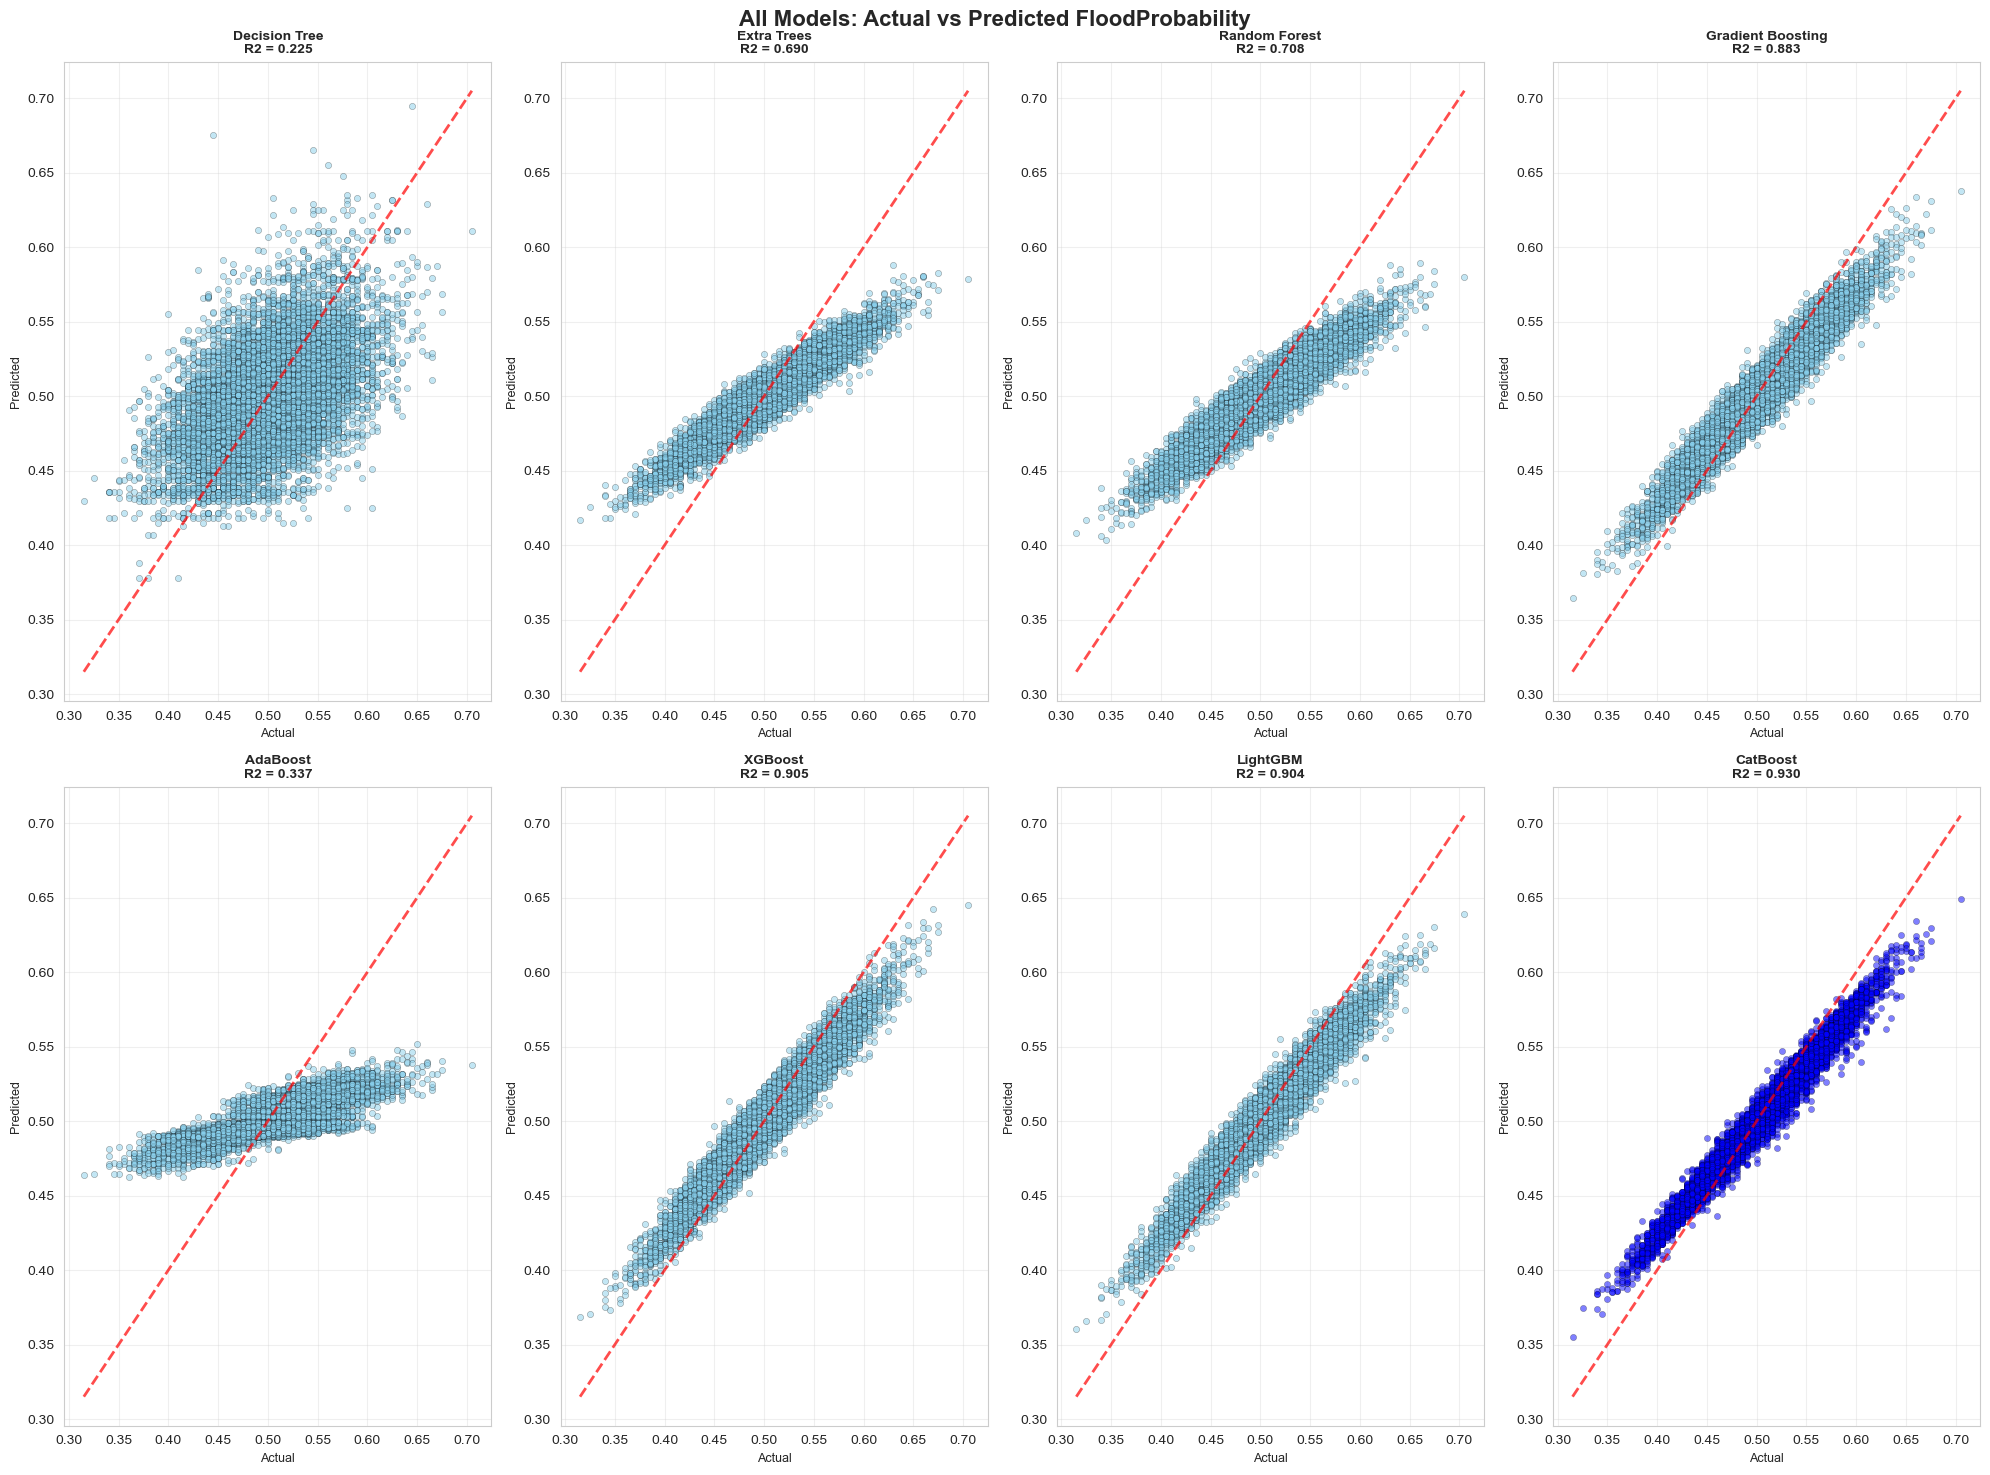

FINAL COMPARISON COMPLETE!
 PROJECT SUMMARY:
   * Total Models Trained: 8
   * Best Model: CatBoost
   * Best R2 Score: 0.9297
   * Best RMSE: 0.0132
   * Dataset Size: 50,000 rows
   * Features Used: 20


In [37]:
# Visualization: All Models Grid View (Actual vs Predicted)
print("ALL MODELS :  ACTUAL VS PREDICTED GRID")



fig, axes = plt.subplots(2, 4, figsize=(20, 15))
fig.suptitle('All Models: Actual vs Predicted FloodProbability', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (model_name, y_pred) in enumerate(all_predictions.items()):
    if idx < len(axes):
        r2_val = results_df.loc[results_df['Model'] == model_name, 'R2'].values[0]
        color = 'blue' if model_name == best_model_name else 'skyblue'

        axes[idx].scatter(y_test, y_pred, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.3)
        axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                      'r--', linewidth=2, alpha=0.7)
        axes[idx].set_xlabel('Actual', fontsize=9)
        axes[idx].set_ylabel('Predicted', fontsize=9)
        axes[idx].set_title(f'{model_name}\nR2 = {r2_val:.3f}', fontsize=10, fontweight='bold')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("FINAL COMPARISON COMPLETE!")

print(f" PROJECT SUMMARY:")
print(f"   * Total Models Trained: 8")
print(f"   * Best Model: {best_model_name}")
print(f"   * Best R2 Score: {results_df.iloc[0]['R2']:.4f}")
print(f"   * Best RMSE: {results_df.iloc[0]['RMSE']:.4f}")
print(f"   * Dataset Size: {len(df):,} rows")
print(f"   * Features Used: {X.shape[1]}")


 Error Statistics:
   Mean Error:        0.0002
   Std Error:         0.0132
   Mean Abs Error:    0.0102
   Max Error:         0.0680
   Min Error:         0.0000
   Median Error:      0.0081


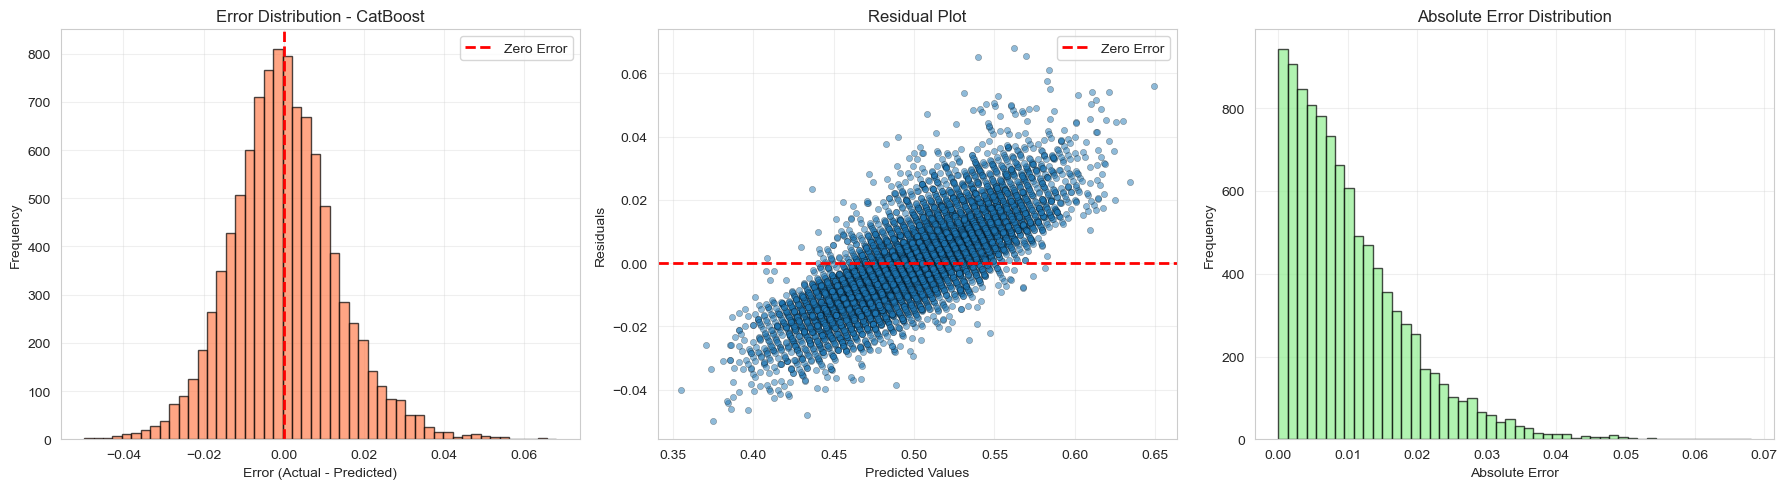

In [38]:
# Best model predictions
y_pred_best = all_predictions[best_model_name]

# Calculate errors
errors = y_test.values - y_pred_best
abs_errors = np.abs(errors)

print(f"\n Error Statistics:")
print(f"   Mean Error:        {errors.mean():.4f}")
print(f"   Std Error:         {errors.std():.4f}")
print(f"   Mean Abs Error:    {abs_errors.mean():.4f}")
print(f"   Max Error:         {abs_errors.max():.4f}")
print(f"   Min Error:         {abs_errors.min():.4f}")
print(f"   Median Error:      {np.median(abs_errors):.4f}")

# Visualize errors
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Error histogram
axes[0].hist(errors, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Error (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Error Distribution - {best_model_name}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residual plot
axes[1].scatter(y_pred_best, errors, alpha=0.5, s=20, edgecolor='black', linewidth=0.3)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Absolute error distribution
axes[2].hist(abs_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Absolute Error')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Absolute Error Distribution')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [39]:
import pickle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Save the best model and scaler
print(f" Saving {best_model_name} model and scaler...")

# Get the best model object
best_model_obj = trained_models[best_model_name]

# Save model
with open('flood_model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

# Save results dataframe for reference
with open('model_results.pkl', 'wb') as f:
    pickle.dump(results_df, f)

print(" Model saved as: flood_model.pkl")
print(" Scaler saved as: scaler.pkl")
print(" Feature names saved as: feature_names.pkl")
print(" Results saved as: model_results.pkl")

# Test loading

with open('flood_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)
print(" All files loaded successfully!")

print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.iloc[0]['R2']:.4f}")

 Saving CatBoost model and scaler...
 Model saved as: flood_model.pkl
 Scaler saved as: scaler.pkl
 Feature names saved as: feature_names.pkl
 Results saved as: model_results.pkl
 All files loaded successfully!

Best Model: CatBoost
R2 Score: 0.9297
